## Dental Appointments
##### This dataset was generated by Claude for cleaning and visualizations purposes based on a very generic prompt and meant for practice purposes.


1. Loading the dataset and exploring data within

In [1]:
import pandas as pd

df_dental = pd.read_csv('../data_raw/dental_appointments_messy.csv')
df_dental.head()

,Patient ID,Patient Name,DOB,Appointment Date,Treatment Code,Treatment Description,Provider,Cost,Insurance Paid,Patient Paid,Status
0,PT001,Jessica Williams,05/12/1985,1/15/2024,D0120,Periodic Oral Evaluation,Dr. Smith,$75.00,$60.00,$15.00,Completed
1,PT001,Jessica Williams,5/12/1985,2/20/2024,D1110,Prophylaxis - Adult,Dr. Smith,125,100.00,$25,Completed
2,PT002,Michael Johnson,11-23-1978,01/08/2024,D0150,Comprehensive Oral Evaluation,Dr. Chen,$125.00,$100.00,$25.00,Completed
3,PT002,Mike Johnson,11/23/1978,1/22/2024,D2391,Resin-based composite - one surface,Dr. Chen,$185.00,148,$37.00,Completed
4,PT003,Sarah Martinez,03/30/1992,1/10/2024,D0120,Periodic Oral Eval,Dr. Smith,75.00,0,$75.00,Completed


In [2]:
df_dental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient ID             33 non-null     object
 1   Patient Name           33 non-null     object
 2   DOB                    32 non-null     object
 3   Appointment Date       32 non-null     object
 4   Treatment Code         33 non-null     object
 5   Treatment Description  33 non-null     object
 6   Provider               33 non-null     object
 7   Cost                   33 non-null     object
 8   Insurance Paid         29 non-null     object
 9   Patient Paid           33 non-null     object
 10  Status                 33 non-null     object
dtypes: object(11)
memory usage: 3.0+ KB


#### Some of the issues identified so far:

1. DOB and Appointment date data type issues and missing values
2. Data inconsistency for the Patient Names > we can see Mike and Michael Johnson with same dob and same patient id but the name is different 
3. Cost column wrongly formatted with currency for some rows and others without
4. Insurance paid column with null defined as 0 or NULL 

In [ ]:
#Cleaning column names

df_dental.columns = (
    df_dental.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

### Data Cleaning
Cleaning Patient Names


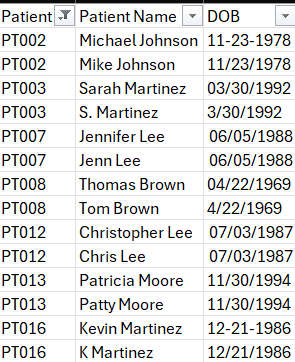

In [ ]:
patient_master = df_dental.groupby('patient_id').agg({
    'patient_name': lambda x: max(x, key=len),
    'dob': 'first'
}).reset_index()

df_dental = df_dental.drop(['patient_name', 'dob'], axis=1)
df_dental = df_dental.merge(patient_master, on='patient_id', how='left')

In [8]:
df_dental.head()

,patient_id,appointment_date,treatment_code,treatment_description,provider,cost,insurance_paid,patient_paid,status,patient_name,dob
0,PT001,1/15/2024,D0120,Periodic Oral Evaluation,Dr. Smith,$75.00,$60.00,$15.00,Completed,Jessica Williams,05/12/1985
1,PT001,2/20/2024,D1110,Prophylaxis - Adult,Dr. Smith,125,100.00,$25,Completed,Jessica Williams,05/12/1985
2,PT002,01/08/2024,D0150,Comprehensive Oral Evaluation,Dr. Chen,$125.00,$100.00,$25.00,Completed,Michael Johnson,11-23-1978
3,PT002,1/22/2024,D2391,Resin-based composite - one surface,Dr. Chen,$185.00,148,$37.00,Completed,Michael Johnson,11-23-1978
4,PT003,1/10/2024,D0120,Periodic Oral Eval,Dr. Smith,75.00,0,$75.00,Completed,Sarah Martinez,03/30/1992


#### Standardizing the dates

In [9]:
df_dental.head()

,patient_id,appointment_date,treatment_code,treatment_description,provider,cost,insurance_paid,patient_paid,status,patient_name,dob
0,PT001,1/15/2024,D0120,Periodic Oral Evaluation,Dr. Smith,$75.00,$60.00,$15.00,Completed,Jessica Williams,05/12/1985
1,PT001,2/20/2024,D1110,Prophylaxis - Adult,Dr. Smith,125,100.00,$25,Completed,Jessica Williams,05/12/1985
2,PT002,01/08/2024,D0150,Comprehensive Oral Evaluation,Dr. Chen,$125.00,$100.00,$25.00,Completed,Michael Johnson,11-23-1978
3,PT002,1/22/2024,D2391,Resin-based composite - one surface,Dr. Chen,$185.00,148,$37.00,Completed,Michael Johnson,11-23-1978
4,PT003,1/10/2024,D0120,Periodic Oral Eval,Dr. Smith,75.00,0,$75.00,Completed,Sarah Martinez,03/30/1992


Different dob formats can be seen:



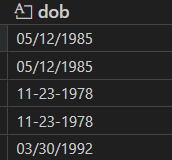

In [10]:


df_dental['dob'] = pd.to_datetime(df_dental['dob'], errors='coerce').dt.date
df_dental['appointment_date'] = pd.to_datetime(df_dental['appointment_date'], errors='coerce').dt.date

In [12]:
df_dental.head()

,patient_id,appointment_date,treatment_code,treatment_description,provider,cost,insurance_paid,patient_paid,status,patient_name,dob
0,PT001,2024-01-15,D0120,Periodic Oral Evaluation,Dr. Smith,$75.00,$60.00,$15.00,Completed,Jessica Williams,1985-05-12
1,PT001,2024-02-20,D1110,Prophylaxis - Adult,Dr. Smith,125,100.00,$25,Completed,Jessica Williams,1985-05-12
2,PT002,2024-01-08,D0150,Comprehensive Oral Evaluation,Dr. Chen,$125.00,$100.00,$25.00,Completed,Michael Johnson,NaT
3,PT002,2024-01-22,D2391,Resin-based composite - one surface,Dr. Chen,$185.00,148,$37.00,Completed,Michael Johnson,NaT
4,PT003,2024-01-10,D0120,Periodic Oral Eval,Dr. Smith,75.00,0,$75.00,Completed,Sarah Martinez,1992-03-30


In [19]:
# Fill missing DOBs using the first valid value per patient
df_dental['dob'] = df_dental.groupby('patient_id')['dob'].transform('first')

#### Cleaning currency fields

In [23]:
df_dental['cost'] = df_dental['cost'].astype(str).str.replace('$', '').str.replace(',', '').str.strip()

In [25]:
df_dental.head()

,patient_id,appointment_date,treatment_code,treatment_description,provider,cost,insurance_paid,patient_paid,status,patient_name,dob
0,PT001,2024-01-15,D0120,Periodic Oral Evaluation,Dr. Smith,75.00,$60.00,$15.00,Completed,Jessica Williams,1985-05-12
1,PT001,2024-02-20,D1110,Prophylaxis - Adult,Dr. Smith,125,100.00,$25,Completed,Jessica Williams,1985-05-12
2,PT002,2024-01-08,D0150,Comprehensive Oral Evaluation,Dr. Chen,125.00,$100.00,$25.00,Completed,Michael Johnson,None
3,PT002,2024-01-22,D2391,Resin-based composite - one surface,Dr. Chen,185.00,148,$37.00,Completed,Michael Johnson,None
4,PT003,2024-01-10,D0120,Periodic Oral Eval,Dr. Smith,75.00,0,$75.00,Completed,Sarah Martinez,1992-03-30


In [26]:
df_dental['cost'] = pd.to_numeric(df_dental['cost'], errors='coerce')

In [27]:
df_dental['insurance_paid'] = df_dental['insurance_paid'].astype(str).str.replace('$', '').str.replace(',', '').str.strip()
df_dental['insurance_paid'] = pd.to_numeric(df_dental['insurance_paid'], errors='coerce')

df_dental['patient_paid'] = df_dental['patient_paid'].astype(str).str.replace('$', '').str.replace(',', '').str.strip()
df_dental['patient_paid'] = pd.to_numeric(df_dental['patient_paid'], errors='coerce')


In [28]:
df_dental.head()

,patient_id,appointment_date,treatment_code,treatment_description,provider,cost,insurance_paid,patient_paid,status,patient_name,dob
0,PT001,2024-01-15,D0120,Periodic Oral Evaluation,Dr. Smith,75.0,60.0,15.0,Completed,Jessica Williams,1985-05-12
1,PT001,2024-02-20,D1110,Prophylaxis - Adult,Dr. Smith,125.0,100.0,25.0,Completed,Jessica Williams,1985-05-12
2,PT002,2024-01-08,D0150,Comprehensive Oral Evaluation,Dr. Chen,125.0,100.0,25.0,Completed,Michael Johnson,None
3,PT002,2024-01-22,D2391,Resin-based composite - one surface,Dr. Chen,185.0,148.0,37.0,Completed,Michael Johnson,None
4,PT003,2024-01-10,D0120,Periodic Oral Eval,Dr. Smith,75.0,0.0,75.0,Completed,Sarah Martinez,1992-03-30


In [29]:
df_dental['insurance_paid'] = df_dental['insurance_paid'].fillna(0)
df_dental['patient_paid'] = df_dental['patient_paid'].fillna(0)

In [30]:
df_dental['cost'] = df_dental['cost'].round(2)
df_dental['insurance_paid'] = df_dental['insurance_paid'].round(2)
df_dental['patient_paid'] = df_dental['patient_paid'].round(2)

df_dental[['cost', 'insurance_paid', 'patient_paid']].head(10)

,cost,insurance_paid,patient_paid
0,75.0,60.0,15.0
1,125.0,100.0,25.0
2,125.0,100.0,25.0
3,185.0,148.0,37.0
4,75.0,0.0,75.0
5,275.0,220.0,55.0
6,150.0,120.0,30.0
7,1200.0,960.0,240.0
8,75.0,0.0,75.0
9,75.0,0.0,75.0


Standardizing categorical features

In [31]:
# Standardize provider names - capitalize properly
df_dental['provider'] = df_dental['provider'].str.strip()
print("Providers:", df_dental['provider'].unique())

# Standardize status - title case
df_dental['status'] = df_dental['status'].str.strip().str.title()
print("\nStatuses:", df_dental['status'].unique())

# Standardize treatment descriptions
df_dental['treatment_description'] = df_dental['treatment_description'].str.replace('Oral Eval', 'Oral Evaluation')
df_dental['treatment_description'] = df_dental['treatment_description'].str.replace('Prophylaxis - adult', 'Prophylaxis - Adult')
df_dental['treatment_description'] = df_dental['treatment_description'].str.replace('Resin composite', 'Resin-based composite')
df_dental['treatment_description'] = df_dental['treatment_description'].str.replace('Bitewings - 4 films', 'Bitewings - four films')

print("\nTreatments:", df_dental['treatment_description'].unique())

Providers: ['Dr. Smith' 'Dr. Chen' 'Dr. Rodriguez']

Statuses: ['Completed' 'No Show' 'Pending' 'Cancelled' 'Pending Payment']

Treatments: ['Periodic Oral Evaluationuation' 'Prophylaxis - Adult'
 'Comprehensive Oral Evaluationuation'
 'Resin-based composite - one surface' 'Periodic Oral Evaluation'
 'Periodontal scaling - per quadrant' 'Intraoral - complete series'
 'Crown - porcelain/ceramic' 'Bitewings - four films'
 'Extraction - erupted tooth' 'Resin-based composite - two surfaces'
 'Periodontal maintenance' 'Comprehensive Oral Evaluation'
 'Crown - porcelain fused to high noble metal'
 'Resin-based composite - three surfaces']


In [32]:
df_dental.head(10)

,patient_id,appointment_date,treatment_code,treatment_description,provider,cost,insurance_paid,patient_paid,status,patient_name,dob
0,PT001,2024-01-15,D0120,Periodic Oral Evaluationuation,Dr. Smith,75.0,60.0,15.0,Completed,Jessica Williams,1985-05-12
1,PT001,2024-02-20,D1110,Prophylaxis - Adult,Dr. Smith,125.0,100.0,25.0,Completed,Jessica Williams,1985-05-12
2,PT002,2024-01-08,D0150,Comprehensive Oral Evaluationuation,Dr. Chen,125.0,100.0,25.0,Completed,Michael Johnson,None
3,PT002,2024-01-22,D2391,Resin-based composite - one surface,Dr. Chen,185.0,148.0,37.0,Completed,Michael Johnson,None
4,PT003,2024-01-10,D0120,Periodic Oral Evaluation,Dr. Smith,75.0,0.0,75.0,Completed,Sarah Martinez,1992-03-30
5,PT003,2024-02-14,D4341,Periodontal scaling - per quadrant,Dr. Rodriguez,275.0,220.0,55.0,Completed,Sarah Martinez,1992-03-30
6,PT004,2024-01-05,D0210,Intraoral - complete series,Dr. Smith,150.0,120.0,30.0,Completed,Robert Chen,1980-07-19
7,PT004,2024-01-19,D2740,Crown - porcelain/ceramic,Dr. Chen,1200.0,960.0,240.0,Completed,Robert Chen,1980-07-19
8,PT005,2024-01-12,D0120,Periodic Oral Evaluationuation,Dr. Rodriguez,75.0,0.0,75.0,No Show,Emily Davis,1995-12-08
9,PT005,2024-02-16,D0120,Periodic Oral Evaluationuation,Dr. Rodriguez,75.0,0.0,75.0,Completed,Emily Davis,1995-12-08


#### Checking Null

In [33]:
df_dental.isnull().sum()

patient_id                0
appointment_date          1
treatment_code            0
treatment_description     0
provider                  0
cost                      0
insurance_paid            0
patient_paid              0
status                    0
patient_name              0
dob                      10
dtype: int64

In [34]:
# Validating payments
df_dental['payment_check'] = df_dental['cost'] - (df_dental['insurance_paid'] + df_dental['patient_paid'])
mismatches = df_dental[df_dental['payment_check'].abs() > 0.01]

print(f"Mismatches found: {len(mismatches)}")
if len(mismatches) > 0:
    print(mismatches[['patient_id', 'cost', 'insurance_paid', 'patient_paid', 'payment_check']])


Mismatches found: 0


Checking for anomalies


In [35]:
print(f"High costs (>$1000): {len(df_dental[df_dental['cost'] > 1000])}")
print(df_dental[df_dental['cost'] > 1000][['patient_name', 'treatment_description', 'cost']])

High costs (>$1000): 3
       patient_name                        treatment_description    cost
7       Robert Chen                    Crown - porcelain/ceramic  1200.0
23  Christopher Lee  Crown - porcelain fused to high noble metal  1350.0
31   Kevin Martinez                    Crown - porcelain/ceramic  1200.0


Not necessarily anomalies but rather expensive treatments...

In [36]:
# exporting cleaned data

df_dental.to_csv('dental_appointments_clean.csv', index=False)